# Import Python Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score ,mean_squared_error, mean_absolute_error
import pickle

## Data Acquisition

In [2]:
evdata = pd.read_csv("C:\\Users\\gjgau\\Downloads\\evdataset.csv")

In [50]:
evdata

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1116,Porsche,https://ev-database.org/car/1116/Porsche-Tayca...,390,290,340,560,370,450,2.8,...,45,980,4963,1966,1378,2900,2870,575,366,4
190,1533,Volkswagen,https://ev-database.org/car/1533/Volkswagen-ID...,440,320,380,660,415,515,7.9,...,55,570,4261,1809,1568,2771,2280,420,385,4
191,1547,Citroen,https://ev-database.org/car/1547/Citroen-e-Ber...,210,140,170,295,170,220,11.7,...,27,310,4753,1921,1849,2975,2440,639,806,7
192,1492,Audi,https://ev-database.org/car/1492/Audi-Q4-Sport...,395,290,340,580,370,460,6.2,...,49,500,4588,1865,1614,2764,2715,575,535,5


In [4]:
evdata.describe()


,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


### Correlation Matrix

In [5]:
corr_matrix = evdata.select_dtypes(include= [np.number]).corr()


In [6]:
corr_matrix

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
id,1.000000,0.148643,0.125678,0.133956,0.132667,0.117581,0.122418,-0.016639,0.001646,0.128289,...,-0.069925,-0.006527,0.144799,0.092202,0.132081,0.207595,0.127113,-0.006921,0.009927,0.106599
City - Cold Weather,0.148643,1.000000,0.993877,0.997671,0.995403,0.989605,0.992702,-0.687348,0.690191,0.995611,...,0.379922,0.681541,0.258353,0.315336,-0.482570,0.106606,0.316749,-0.333713,-0.104651,-0.456558
Highway - Cold Weather,0.125678,0.993877,1.000000,0.998745,0.995948,0.998854,0.998701,-0.713855,0.717689,0.999215,...,0.410197,0.709545,0.234153,0.291067,-0.545106,0.070969,0.281990,-0.365036,-0.138673,-0.501088
Combined - Cold Weather,0.133956,0.997671,0.998745,1.000000,0.997390,0.996644,0.997891,-0.706070,0.708448,0.999298,...,0.400040,0.701283,0.241118,0.299863,-0.522741,0.082223,0.294072,-0.354403,-0.128335,-0.485633
City - Mild Weather,0.132667,0.995403,0.995948,0.997390,1.000000,0.995482,0.998164,-0.694927,0.683766,0.998262,...,0.426630,0.682200,0.192315,0.248088,-0.534071,0.041454,0.240715,-0.387497,-0.152617,-0.501402
Highway - Mild Weather,0.117581,0.989605,0.998854,0.996644,0.995482,1.000000,0.999207,-0.716631,0.715785,0.998401,...,0.426898,0.712565,0.208880,0.264448,-0.567585,0.046288,0.251309,-0.385029,-0.159389,-0.518491
Combined - Mild Weather,0.122418,0.992702,0.998701,0.997891,0.998164,0.999207,1.000000,-0.708977,0.703094,0.999340,...,0.428057,0.701561,0.201721,0.257352,-0.554953,0.042971,0.246900,-0.387039,-0.156062,-0.512409
Acceleration 0 - 100 km/h,-0.016639,-0.687348,-0.713855,-0.706070,-0.694927,-0.716631,-0.708977,1.000000,-0.872495,-0.708172,...,-0.405163,-0.711806,0.009513,-0.220777,0.738645,0.239264,-0.054268,0.557870,0.407173,0.726934
Top Speed,0.001646,0.690191,0.717689,0.708448,0.683766,0.715785,0.703094,-0.872495,1.000000,0.706707,...,0.284501,0.825455,0.244581,0.440627,-0.676073,-0.006390,0.251085,-0.328184,-0.215861,-0.597254
Electric Range,0.128289,0.995611,0.999215,0.999298,0.998262,0.998401,0.999340,-0.708172,0.706707,1.000000,...,0.415019,0.701595,0.219826,0.277975,-0.540106,0.061227,0.269258,-0.373626,-0.145220,-0.500843


In [7]:
corr_matrix["Electric Range"].sort_values(ascending=False)

Electric Range                 1.000000
Combined - Mild Weather        0.999340
Combined - Cold Weather        0.999298
Highway - Cold Weather         0.999215
Highway - Mild Weather         0.998401
City - Mild Weather            0.998262
City - Cold Weather            0.995611
Battery Capacity               0.863062
Top Speed                      0.706707
Fastcharge Speed               0.701595
Total Power                    0.637401
Total Torque                   0.614073
Charge Speed                   0.415019
Charge Power                   0.398395
Width                          0.277975
Gross Vehicle Weight (GVWR)    0.269258
Length                         0.219826
id                             0.128289
Wheelbase                      0.061227
Cargo Volume                  -0.145220
Max. Payload                  -0.373626
Seats                         -0.500843
Height                        -0.540106
Acceleration 0 - 100 km/h     -0.708172
Name: Electric Range, dtype: float64

### checkin unique values


In [8]:
evdata.nunique()

id                             194
Make                            34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

#### Data preprocessing

In [9]:
evdata.replace({'Drive':{'Rear':2, 'Front':0, 'AWD':1}}, inplace = True)


#### Target variable

In [10]:
y = evdata[['Electric Range', 'City - Cold Weather','Highway - Cold Weather',  'Combined - Cold Weather','City - Mild Weather', 'Highway - Mild Weather', 'Combined - Mild Weather']]

In [11]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


#### Defining input variable

In [12]:
x = evdata.drop(['Electric Range', 'City - Cold Weather','Highway - Cold Weather',  'Combined - Cold Weather','City - Mild Weather', 'Highway - Mild Weather', 'Combined - Mild Weather', 'link', 'Make','id' ], axis =1)

In [13]:
x

,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,7.8,185,168,350,2,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5
1,6.2,160,215,520,1,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
2,3.2,260,500,850,1,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4
3,5.7,190,250,430,2,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5
4,7.9,160,150,310,2,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2.8,260,560,1050,1,93.4,11.0,45,980,4963,1966,1378,2900,2870,575,366,4
190,7.9,160,150,310,2,82.0,11.0,55,570,4261,1809,1568,2771,2280,420,385,4
191,11.7,135,100,260,0,50.0,7.4,27,310,4753,1921,1849,2975,2440,639,806,7
192,6.2,180,220,460,1,82.0,11.0,49,500,4588,1865,1614,2764,2715,575,535,5


####  transformin the data between 0 to 1 values

In [14]:
from sklearn import preprocessing
x = preprocessing.normalize(x)

In [15]:
x

array([[0.00119138, 0.02825717, 0.02566057, ..., 0.09088117, 0.06598431,
        0.00076371],
       [0.00093573, 0.02414776, 0.03244856, ..., 0.07244329, 0.07470714,
        0.00105646],
       [0.00045408, 0.03689367, 0.07094936, ..., 0.08159176, 0.05193493,
        0.00056759],
       ...,
       [0.00172963, 0.01995731, 0.01478319, ..., 0.0944646 , 0.11915254,
        0.00103482],
       [0.00094207, 0.02735056, 0.03342846, ..., 0.08736983, 0.08129193,
        0.00075974],
       [0.00194969, 0.01772447, 0.01363421, ..., 0.14234112, 0.08221427,
        0.00122708]])

In [16]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


###  Model Training

In [51]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state =101)

In [52]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [53]:
pickle.dump(reg, open('model.pkl', 'wb'))


In [64]:
pred_MLR = reg.predict(X_test)


In [78]:
r2score = r2_score(y_test, pred_MLR)

In [79]:
r2score


0.9794812365769595

#### Scatter Plot

Text(0.5, 1.0, 'Actual range vs Predicted range(Testing)')

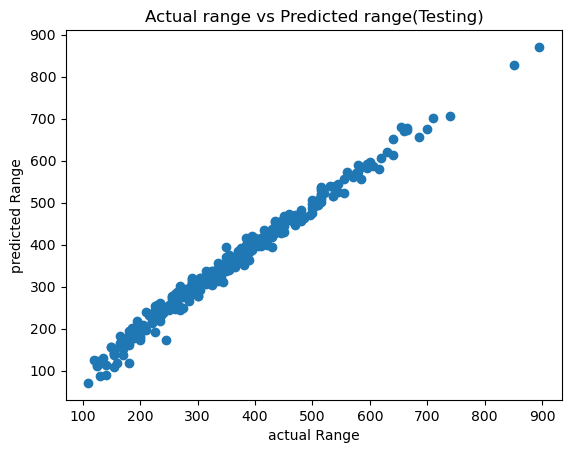

In [54]:
pred = reg.predict(X_test)
plt.scatter(y_test, pred)
plt.xlabel("actual Range")
plt.ylabel("predicted Range")
plt.title("Actual range vs Predicted range(Testing)")

### Results

In [67]:

mae = mean_absolute_error(y_test ,pred_MLR)
mae

10.595082284759062

In [68]:
mse=  mean_squared_error(y_test, pred_MLR)

In [69]:
mse

213.46130833664907

In [74]:
accuracy = r2_score(y_test, pred_MLR)

In [75]:
print(accuracy)


0.9794812365769595


### Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
    'n_estimators': randint(low = 1 ,high = 200), 
    'max_features': randint(low =1 , high = 15),
}
forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, param_distribs , random_state = 42)
rnd_search.fit(X_train ,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024EE322A510>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000024EE3211510>},
                   random_state=42)

In [80]:
RandomForest_prediction = rnd_search.predict(X_test)

In [82]:
R2_SCORE = r2_score(y_test,RandomForest_prediction)
print(R2_SCORE)

0.9597423057546347


#### Scatter Plot

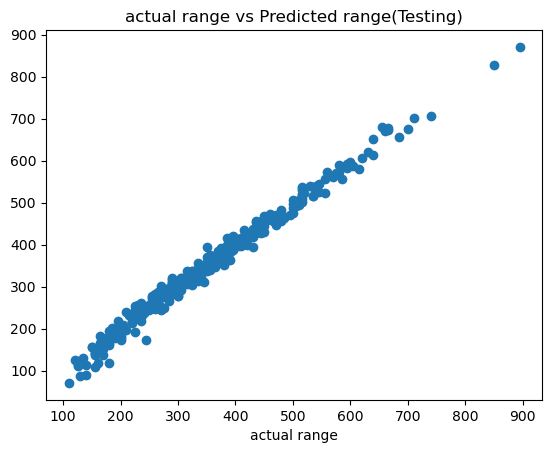

In [25]:
testing_data_prediction1 = rnd_search.predict(X_test)
plt.scatter(y_test, pred)
plt.xlabel("actual range")
plt.title("actual range vs Predicted range(Testing)")
plt.show()

### Results

In [83]:
mae = mean_absolute_error(y_test, RandomForest_prediction)

In [84]:
mae

12.372881355932206

In [85]:
accuracy2 = r2_score(y_test, RandomForest_prediction)

In [86]:
print(accuracy2)

0.9597423057546347


### using Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [34]:
param_grid = [{'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]}, {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]},]

In [35]:
rfc = RandomForestClassifier()
grid_search = GridSearchCV(rfc, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
rfc_clf = grid_search.best_estimator_

In [37]:
rfc_clf

RandomForestClassifier(max_features=8, n_estimators=30)

In [38]:
rfc_clf_predictions = rfc_clf.predict(X_test)

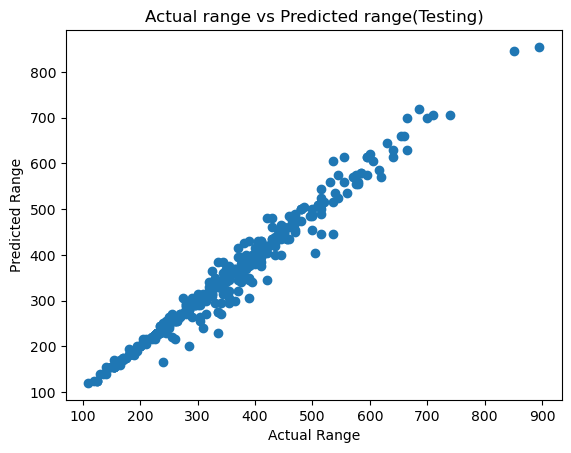

In [39]:
plt.scatter(y_test, rfc_clf_predictions)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()

In [87]:
mae = mean_absolute_error(y_test, rfc_clf_predictions)
mae

12.397094430992736

In [88]:
R2_score = r2_score(y_test, rfc_clf_predictions)
R2_score

0.9550052017809258

### Decision Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state = 2000)
tree_reg.fit(X_train , y_train)

DecisionTreeRegressor(random_state=2000)

In [89]:
predictions = tree_reg.predict(X_test)


In [90]:
mae3 = mean_absolute_error(y_test, predictions)
mae3

13.087167070217918

In [93]:
R2_score_decision_tree = r2_score(y_test, predictions)
R2_score_decision_tree

0.9386204387199744

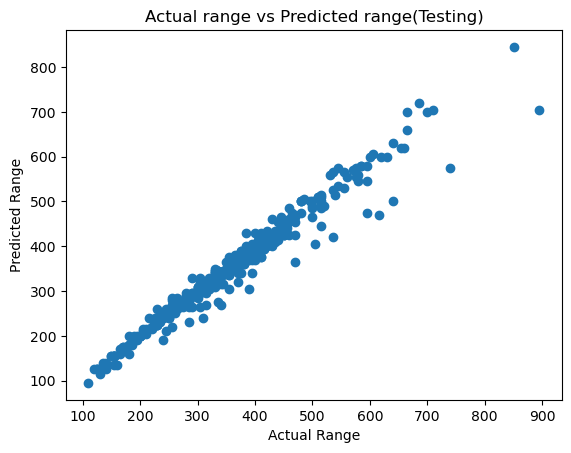

In [49]:
plt.scatter(y_test, predictions)
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Testing)")
plt.show()